# Stochastic Gradient Descent

### 1. Loading Diabetes Dataset from Sklearn Library
### 2. Custom SGD Regressor implementation (PART-1)
### 2. Sklearn's SGD Regressor implementation (PART-2)
### 4. Comparing Both the implementaton

##### NOTE :- In each implementation plot the graph for the predicted vs actual values in the dataset(part1, part 2)

In [28]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_diabetes
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import c_

## 1. Loading Boston Dataset from Sklearn Library

In [29]:
dataset = load_diabetes()
X = pd.DataFrame(dataset.data)
y = dataset.target

print("="*100)
print("Dataset\n")
print(X[:4])
print(type(X))

print("="*100)
print("Diabetic Value\n")
print(y[:4])
print(type(y))

print("="*100)


Dataset

          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   

          7         8         9  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
<class 'pandas.core.frame.DataFrame'>
Diabetic Value

[151.  75. 141. 206.]
<class 'numpy.ndarray'>


In [30]:
X_tr, X_te, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [31]:
# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_tr)
X_test = sc.transform(X_te)

## 2. Custom SGD Regressor implementation (PART-1)

In [32]:
#Fitting the train Dataset in the custom SGD Regressor model


# Modifying dataset for getting the random row according to batch size in each iteration in the custom SGD model
X_tr = np.c_[np.ones((len(X_train),1)),X_train]
X_train = X_tr

X_te = np.c_[np.ones((len(X_test),1)),X_test]
X_test = X_te

# initialising the values for fitting the model
max_iter = 1000 #initialising no of iterations
learning_rate=0.01 #initialising the learning
length = len(Y_train) #  length of the data set
error = []

# Generating normally distributed values of the train dataset
weight = np.random.normal(0,1,X_train.shape[1])
weight = np.c_[weight]


# MODEL
for k in range(max_iter):
    for i in range(length):
        batch_size = np.random.randint(0,length)
        X_batch = X_train[batch_size,:].reshape(1,X_train.shape[1])
        y_batch = Y_train[batch_size].reshape(1,1)
        prediction = np.dot(X_batch,weight)
        weight = weight -(2/length)*learning_rate*( X_batch.T.dot((prediction - y_batch)))

In [33]:
pred_custom = X_test.dot(weight)
pred_custom = pred_custom.ravel()

In [34]:
#Weights from Custom SGD Model
# weight_custom = []
# for i in weight:
#     weight_custom.append(i)
weight_custom = weight.ravel()
print(c_[weight_custom])


[[ 1.50730419e+02]
 [-2.83078038e+00]
 [-9.66894285e+00]
 [ 2.50973816e+01]
 [ 1.58836001e+01]
 [-3.95179342e+00]
 [-1.28173645e-01]
 [-9.11634408e+00]
 [ 4.26737614e+00]
 [ 2.33228210e+01]
 [ 5.81422780e-01]]


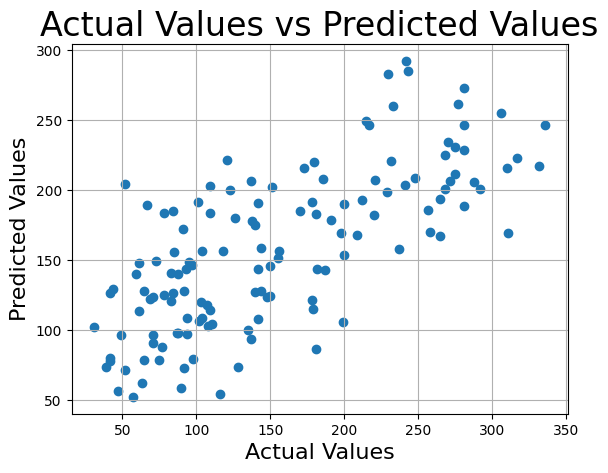

In [35]:
# Plotting graph for actual vs predicted price
plt.scatter(Y_test, pred_custom)
plt.xlabel("Actual Values",size=16)
plt.ylabel("Predicted Values",size=16)
plt.title("Actual Values vs Predicted Values",size=24)
plt.grid()
plt.show()

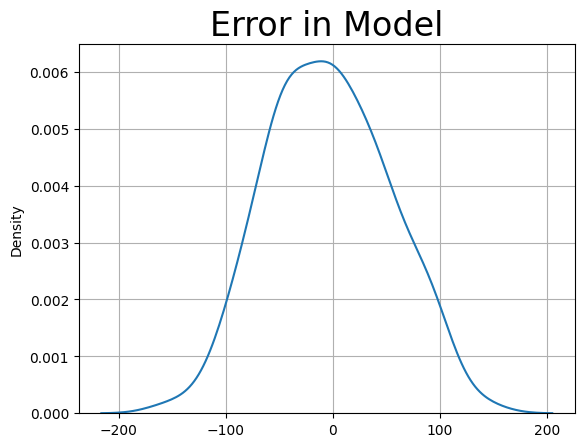

In [36]:
error = Y_test - pred_custom; #error = actual_price - predicted_price
sns.kdeplot(error)
plt.title("Error in Model",size=24)
plt.grid()
plt.show()

In [37]:
# Obtaining Mean Squared Error (MSE)
MSE_CUSTOM = mean_squared_error(Y_test, pred_custom)
print("Mean Squared Error (MSE) = ",MSE_CUSTOM)

Mean Squared Error (MSE) =  3159.5648449791947


## 3. Sklearn's SGD Regressor implementation (PART-2)

In [38]:
model = linear_model.SGDRegressor(penalty='l1', max_iter=1000, learning_rate='constant')
model.fit(X_train,Y_train)
pred_sklearn = model.predict(X_test)

In [39]:
#Weights from Sklearn Model
weight_sklearn = model.coef_
print(c_[weight_sklearn])

[[ 76.07780756]
 [ -1.97540772]
 [ -8.87099548]
 [ 23.28788572]
 [ 16.40266897]
 [ -5.37819975]
 [  0.86745141]
 [-10.41437505]
 [  4.58957714]
 [ 20.46167889]
 [  0.15114157]]


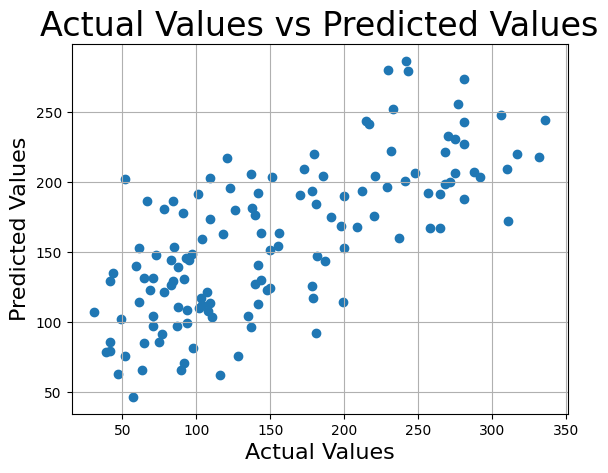

In [40]:
# Plotting graph for actual vs predicted price
plt.scatter(Y_test, pred_sklearn)
plt.xlabel("Actual Values",size=16)
plt.ylabel("Predicted Values",size=16)
plt.title("Actual Values vs Predicted Values",size=24)
plt.grid()
plt.show()

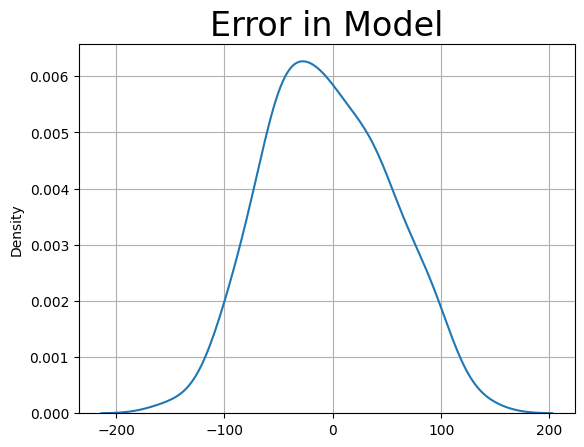

In [41]:
error = Y_test - pred_sklearn; #error = actual_price - predicted_price
sns.kdeplot(error)
plt.title("Error in Model",size=24)
plt.grid()
plt.show()

In [42]:
# Obtaining Mean Squared Error (MSE)
MSE_SKLEARN = mean_squared_error(Y_test, pred_sklearn)
print("Mean Squared Error (MSE) = ",MSE_SKLEARN)

Mean Squared Error (MSE) =  3184.518441404834


## 4. Comparing Both the implementaton

In [43]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

# Initializing prettytable
preety_table = PrettyTable()

slno = [1,2,3,4,5,6,7,8,9,10,11]


# Adding columns
preety_table.add_column("SL NO.",slno)
preety_table.add_column("Weights of Manual SGD",weight_custom)
preety_table.add_column("Weights of Sklearn's SGD",weight_sklearn)

# Printing the Table
print(preety_table)

+--------+-----------------------+--------------------------+
| SL NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+--------+-----------------------+--------------------------+
|   1    |   150.73041907120975  |    76.07780756031701     |
|   2    |  -2.8307803756469574  |   -1.9754077234959446    |
|   3    |   -9.668942848066225  |    -8.87099547545577     |
|   4    |   25.097381615747548  |    23.28788572330997     |
|   5    |   15.883600082902163  |    16.402668969991225    |
|   6    |   -3.951793417555054  |    -5.378199749662071    |
|   7    |  -0.12817364522884428 |    0.8674514130452274    |
|   8    |   -9.116344082613146  |    -10.41437505445493    |
|   9    |   4.2673761430804245  |    4.589577139564896     |
|   10   |   23.322821020101223  |    20.46167888538552     |
|   11   |   0.5814227798995821  |   0.15114156923854058    |
+--------+-----------------------+--------------------------+


In [44]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

# Initializing prettytable
preety_table = PrettyTable()

preety_table.field_names = ["SGD Type","Mean Squared Error"]
preety_table.add_row(["Custom SGD",MSE_CUSTOM])
preety_table.add_row(["Sklearn SGD",MSE_SKLEARN])


print(preety_table)



+-------------+--------------------+
|   SGD Type  | Mean Squared Error |
+-------------+--------------------+
|  Custom SGD | 3159.5648449791947 |
| Sklearn SGD | 3184.518441404834  |
+-------------+--------------------+


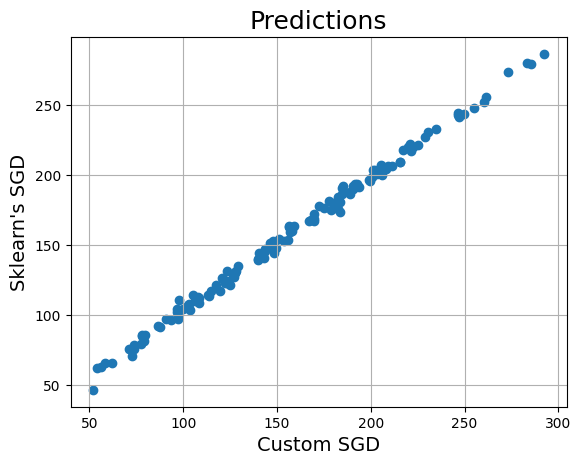

In [45]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(pred_custom, pred_sklearn)
plt.xlabel("Custom SGD",size=14)
plt.ylabel("Sklearn's SGD",size=14)
plt.title("Predictions",size=18)
plt.grid()
plt.show()


## Conclusion
- > MSE of Custom SGD is slightly higher than the Sklearn SGD, therefore the custom model is performing well here
- > Weights of both the models are approximately similar
- > As we can see on the above prediction graph that the predicted value in sklearn and custom are giving aprroximately same value of predicted price

# ***************************************END***************************************************